In [1]:
include("Main_module.jl")
using .TDQMC

In [2]:
using DataFrames, CSV, PyPlot

In [3]:
P = Parameter{Float64,Int64}()
Dy = Dynamics{Float64,Int64}();

In [4]:
tr = Matrix(CSV.read("Ground_Trajectory.csv", DataFrame))
dp = Matrix(CSV.read("Ground_Displace.csv", DataFrame))

301×1001 Matrix{Any}:
 -1.07372  1.79318  1.92994  …  "0.0 - 0.0im"
 -1.02617  1.82691  1.95885     "0.05 - 0.05im"
 -1.04867  1.86605  1.9402      "0.1 - 0.1im"
 -1.05589  1.84189  1.95738     "0.15000000000000002 - 0.15000000000000002im"
 -1.01969  1.7989   1.91719     "0.2 - 0.2im"
 -1.0127   1.83281  1.93809  …  "0.25 - 0.25im"
 -1.04556  1.86235  1.909       "0.30000000000000004 - 0.30000000000000004im"
 -1.07342  1.86516  1.87828     "0.35000000000000003 - 0.35000000000000003im"
 -1.10944  1.84823  1.85326     "0.4 - 0.4im"
 -1.06981  1.86027  1.89494     "0.45 - 0.45im"
 -1.04375  1.85479  1.90871  …  "0.5 - 0.5im"
 -1.01833  1.84562  1.93512     "0.55 - 0.55im"
 -1.04861  1.86016  1.97473     "0.6000000000000001 - 0.6000000000000001im"
  ⋮                          ⋱  ⋮
 -1.14247  2.61351  3.21425     "14.450000000000001 - 14.450000000000001im"
 -1.14246  2.61298  3.21479  …  "14.5 - 14.5im"
 -1.1441   2.61409  3.21491     "14.55 - 14.55im"
 -1.14375  2.61365  3.21436     "14.60

In [5]:
Dy.Displace = reshape(dp[:, 1:end-1], (P.step_t + 1, P.Group, P.electron))
Dy.Trajectory = tr

2×500 Matrix{Float64}:
 -1.14273   2.61181   3.21491  -0.444871  …  -2.3347   -0.941986  -1.33534
  2.98227  -1.49174  -1.18971   1.43438       1.84607   1.94141    0.969336

In [6]:
function Density(x::Vector{T}, y::Vector{T}; radius::T = 0.2) where {T<:AbstractFloat}
    local density::Vector = zeros(T, length(x))

    for i in eachindex(x)
        density[i] = sum(((x[i]-radius) .< x .< (x[i]+radius)) .&& ((y[i]-radius) .< y .< (y[i]+radius)))
    end
    
    return density
end

Density (generic function with 1 method)

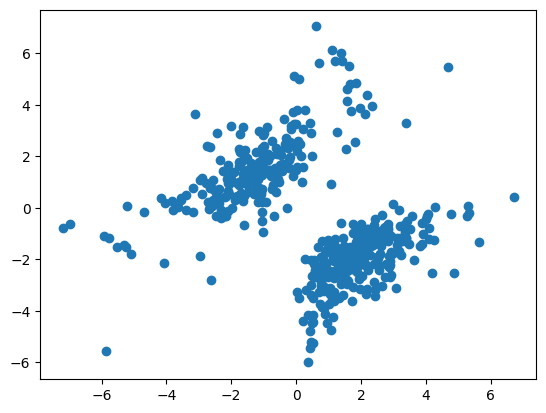

PyObject <matplotlib.collections.PathCollection object at 0x0000000000D2D130>

In [8]:
scatter(Dy.Trajectory[1, :], Dy.Trajectory[2, :])

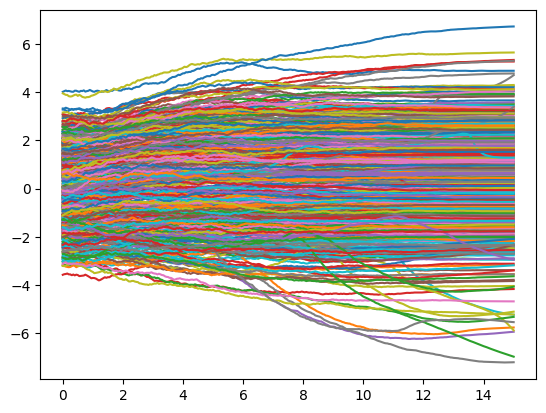

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


500-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4160>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4100>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4220>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4340>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4460>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4580>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D46A0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D47C0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D48E0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4A00>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4B20>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4190>
 PyObject <matplotlib.lines.Line2D object at 0x00000000014D4D30>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x000000000159AC70>
 PyObject <matplotlib.lines.Line2D object at 0x000

In [7]:
plot(real(P.Δt).* (0:P.step_t), Dy.Displace[:, :, 1])

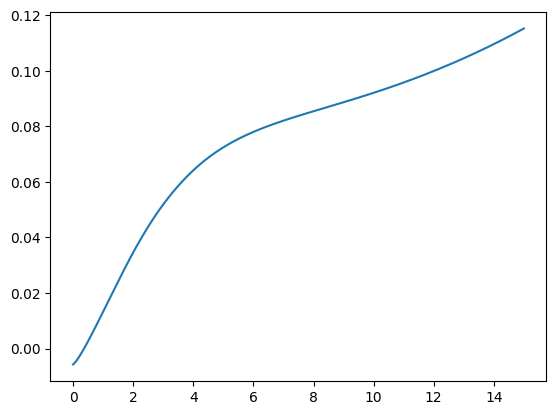

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001678610>

In [8]:
plot(real(P.Δt).* (0:P.step_t), Dy.Displace[:, :, 2])